In [50]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# convert to tensor and normalize the dataset

In [52]:
train_data = MNIST(root='./data',train=True,transform=transform,download=True)
len(train_data)

60000

In [53]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 50

In [54]:
train_loader = DataLoader(train_data, batch_size=batch_size,num_workers=num_workers)

In [55]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([50, 1, 28, 28])
torch.Size([50])


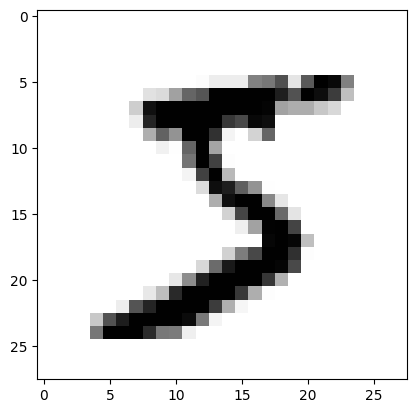

In [56]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

In [68]:
# store for prediction
first_img = images[0].numpy()
first_img.shape

(28, 28)

<h1>Creating the model with CrossEntropyLoss<h1>
which is equal to F.log_softmax + nn.NLLLoss()

In [58]:
class Model(torch.nn.Module):
    def __init__(self):
      super().__init__()
      self.fc1 = torch.nn.Linear(784, 128)
      self.fc2 = torch.nn.Linear(128, 64)
      self.fc3 = torch.nn.Linear(64, 10)

    def forward(self, x):
      x = x.view(x.shape[0], -1) # shape before (1,28,28) after (1,784)
      x = torch.nn.functional.relu(self.fc1(x))
      x = torch.nn.functional.relu(self.fc2(x))
      x = self.fc3(x) # did not use softmax so i will use CrossEntropyLoss
      return x

In [59]:
model = Model()

In [60]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [61]:
# train
for epoch in range(1,11):
  train_loss = []

  for img, lable in train_loader:
    optimizer.zero_grad()
    output = model(img)
    loss = criterion(output, lable)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

  print(f"Epoch: {epoch} Loss: {np.mean(train_loss)}")

Epoch: 1 Loss: 0.35336063471700374
Epoch: 2 Loss: 0.18855587195721454
Epoch: 3 Loss: 0.15168163670338497
Epoch: 4 Loss: 0.13773389393584998
Epoch: 5 Loss: 0.12576460980664705
Epoch: 6 Loss: 0.11855041583585262
Epoch: 7 Loss: 0.11079886110635319
Epoch: 8 Loss: 0.1016781560627957
Epoch: 9 Loss: 0.09935615330758689
Epoch: 10 Loss: 0.09321776607864497


In [79]:
first_img = first_img.reshape(1,28,28)
first_img = torch.from_numpy(first_img)
first_img.shape

torch.Size([1, 28, 28])

In [80]:
# Calculate the class probabilities (softmax) for img
log_ps = model(first_img)
ps = torch.exp(log_ps)
print(ps)
print(ps.shape)

tensor([[5.6001e-11, 4.9606e-04, 4.0854e-02, 1.2552e+02, 2.2810e-06, 2.4084e+04,
         3.7910e-10, 1.1013e-01, 3.6263e-05, 4.0611e-01]],
       grad_fn=<ExpBackward0>)
torch.Size([1, 10])


In [81]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class)

tensor([[5]])


In [84]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([50, 1, 28, 28])
torch.Size([50])


In [85]:
logs_ps = model(images)
ps = torch.exp(logs_ps)
top_p, top_class = ps.topk(1,dim=1)
print(top_class)

tensor([[5],
        [0],
        [4],
        [1],
        [9],
        [2],
        [1],
        [3],
        [1],
        [4],
        [3],
        [5],
        [3],
        [6],
        [1],
        [7],
        [2],
        [8],
        [6],
        [9],
        [4],
        [0],
        [9],
        [1],
        [1],
        [2],
        [4],
        [3],
        [2],
        [2],
        [3],
        [8],
        [6],
        [9],
        [0],
        [5],
        [6],
        [0],
        [7],
        [6],
        [1],
        [8],
        [7],
        [9],
        [3],
        [9],
        [8],
        [5],
        [3],
        [3]])


In [86]:
equals = top_class == labels.view(*top_class.shape)
print(equals)

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True]])


In [87]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 95.99999785423279%
